In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import shutil
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import os

# Set the path to your dataset folder
dataset_path = '/content/Train'

# Navigate to the dataset folder
os.chdir(dataset_path)

# Delete the .ipynb_checkpoints folder
if os.path.exists('.ipynb_checkpoints'):
    os.system('rm -rf .ipynb_checkpoints')

In [ ]:
train_dir="/content/Train"
val_dir="/content/Train"


Found 9159 images belonging to 3 classes.
Found 9159 images belonging to 3 classes.


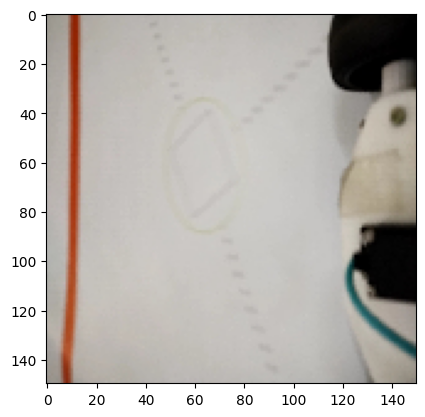

In [ ]:

train_datagen = ImageDataGenerator(rescale=1/255,
                                  validation_split=0.3
                                   )
train_generator = train_datagen.flow_from_directory(train_dir,
                                  target_size=(150, 150),
                                  class_mode="categorical",
                                  batch_size=64)
validation_generator = train_datagen.flow_from_directory(
                                  val_dir,
                                  target_size=(150, 150),
                                  class_mode="categorical",
                                  batch_size=64)

x_val, y_val = validation_generator.next()

# Display a single image from the validation data
plt.imshow(x_val[0])
plt.show()


In [ ]:
# Get the class indices from the train generator
class_indices = train_generator.class_indices

# Invert the dictionary to get a mapping from indices to class names
class_names = {v: k for k, v in class_indices.items()}

# Print the class names
print(class_names)

{0: 'Left', 1: 'Right', 2: 'Straight'}


In [ ]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size=3, input_shape=(150, 150, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Conv2D(64, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, kernel_size=3, activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.Dense(3, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 36, 36, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        3

In [ ]:

from tensorflow import keras
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])


class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs["accuracy"] is not None and logs["val_accuracy"] >= 0.99:
            print("Training is finished...")


In [ ]:
epochs=10
history = model.fit(train_generator, validation_data=validation_generator, epochs=10)


Epoch 1/10
144/144 [==============================] - 171s 1s/step - loss: 0.6686 - accuracy: 0.6825 - val_loss: 0.4188 - val_accuracy: 0.8207
Epoch 2/10
144/144 [==============================] - 148s 1s/step - loss: 0.3876 - accuracy: 0.8287 - val_loss: 0.3564 - val_accuracy: 0.8474
Epoch 3/10
144/144 [==============================] - 147s 1s/step - loss: 0.3459 - accuracy: 0.8511 - val_loss: 0.3229 - val_accuracy: 0.8604
Epoch 4/10
144/144 [==============================] - 145s 1s/step - loss: 0.3302 - accuracy: 0.8583 - val_loss: 0.2930 - val_accuracy: 0.8770
Epoch 5/10
144/144 [==============================] - 145s 1s/step - loss: 0.3052 - accuracy: 0.8700 - val_loss: 0.2718 - val_accuracy: 0.8842
Epoch 6/10
144/144 [==============================] - 146s 1s/step - loss: 0.2870 - accuracy: 0.8755 - val_loss: 0.2614 - val_accuracy: 0.8845
Epoch 7/10
144/144 [==============================] - 146s 1s/step - loss: 0.2834 - accuracy: 0.8800 - val_loss: 0.2654 - val_accuracy: 0.8860

In [ ]:
model.save("wrodetection")

Calculating the accuracy
Calculating the loss
The results are being visualized


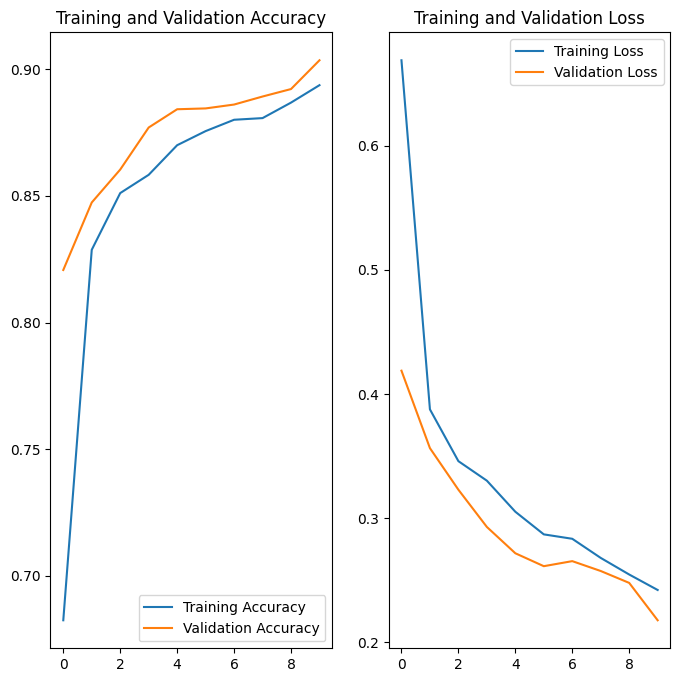

In [ ]:
epochs=10
print("Calculating the accuracy")
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
print("Calculating the loss")
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)
print("The results are being visualized")
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)

plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:

img=x_val[0]
print(type(img))

<class 'numpy.ndarray'>


In [ ]:
import cv2
img=cv2.imread("/content/Train/Left/Image-1035.jpg")
img1=cv2.imread("/content/Train/Right/Image-100.jpg")
img2=cv2.imread("/content/Train/Straight/Image-1009.jpg")


resized = cv2.resize(img, (150,150))
resized1 = cv2.resize(img1, (150,150))
resized2 = cv2.resize(img2, (150,150))

resized.shape

(150, 150, 3)

In [ ]:
# img=np.array(img)
import numpy as np
img = np.reshape(resized, (1,150, 150, 3))
img=img/255


# img=np.array(img)
img1= np.reshape(resized1, (1,150, 150, 3))
img1=img1/255


img2= np.reshape(resized2, (1,150, 150, 3))
img2=img2/255


In [ ]:
#for green image
predictions=model.predict(img,batch_size=1)
print(predictions)
a=max(predictions)
class_names = ["Left", "Right", "Straight"]
predicted_class = class_names[predictions[0].argmax()]
print(predicted_class)

1/1 [==============================] - 0s 138ms/step
[[9.5270038e-01 1.4181863e-06 4.7298204e-02]]
Left


In [ ]:
#for green image
predictions=model.predict(img1,batch_size=1)
print(predictions)
a=max(predictions)
class_names = ["Left", "Right", "Straight"]
predicted_class = class_names[predictions[0].argmax()]
print(predicted_class)

1/1 [==============================] - 0s 17ms/step
[[8.2236375e-06 9.8106337e-01 1.8928448e-02]]
Right


In [ ]:
#for green image
predictions=model.predict(img2,batch_size=1)
print(predictions)
a=max(predictions)
class_names = ["Left", "Right", "Straight"]
predicted_class = class_names[predictions[0].argmax()]
print(predicted_class)

1/1 [==============================] - 0s 18ms/step
[[1.0297578e-05 3.0746471e-02 9.6924323e-01]]
Straight


In [ ]:
!pwd

/content/Train


In [ ]:
import tensorflow as tf
from tensorflow import keras

# Load the saved model
model = keras.models.load_model("wrodetection")

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
with open("wro10.tflite", "wb") as f:
    f.write(tflite_model)